In [1]:
import re

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

np.seterr('ignore')
pd.options.mode.chained_assignment = None
sns.set_style(style="darkgrid")

%matplotlib inline

## Logistics Regression

In [2]:
df = pd.read_csv('../data/fifa.csv').drop('Unnamed: 0', axis=1)

In [3]:
df.head(3)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M


#### Drop data with missing values in any of the fields: Overall, Reactions, Composure, Potential, and International Reputation

Load data. Drop data with missing values in any of the fields: Overall, Reactions, Composure, Potential, and International Reputation. How many rows are there?
 **Answer:** 18159

In [4]:
df_lr = df.dropna(subset = ['Overall', 'Reactions', 'Composure','Potential', 'International Reputation'], axis=0)

In [5]:
df_lr.shape[0]

18159

#### Create a new column named is_bad_reputation which is 1 if the players reputation is 1 and 0 otherwise. 

In [6]:
df_lr['International Reputation'].unique()

array([5., 4., 3., 2., 1.])

In [7]:
df_lr['is_bad_reputation'] = np.where(df_lr['International Reputation']==1, 1, 0)
#df_lr['is_bad_reputation'] = df_lr['International Reputation'].apply(lambda x: 1 if x == 1 else 0) 

#### Fit a Logistic Regression Model with is_bad_reputation as target, and Overall as the only variable. 

In [8]:
lr = smf.glm(formula = 'is_bad_reputation ~ Overall', data=df_lr, family=sm.families.Binomial())
lr = lr.fit()
lr.params

Intercept    32.706152
Overall      -0.424407
dtype: float64

In [9]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      is_bad_reputation   No. Observations:                18159
Model:                            GLM   Df Residuals:                    18157
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2817.4
Date:                Fri, 09 Aug 2019   Deviance:                       5634.7
Time:                        11:40:37   Pearson chi2:                 3.43e+04
No. Iterations:                     8   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     32.7062      0.681     47.996      0.000      31.371      34.042
Overall       -0.4244      0.009    -46.209      0.000      -0.442      -0.406
==============================================================================
"""

#### Logistic model interpretation
   $$p = P(\text{player is_bad_reputation}) =  \frac{exp(\beta_0 + \beta_1 * \text{Overall})}{1 + exp(\beta_0 + \beta_1 * \text{Overall})}$$
- In this logistic regression model, we define 
    - probability: $p$ the probability of a player with a bad reputation
    - odds:  $\frac{p}{1-p} = exp(\beta_0 + \beta_1 * \text{Overall})$
    - log odds:  $ log\left(\frac{p}{1-p}\right) = \beta_0 + \beta_1 * \text{Overall}$. 
    - odds ratio : $$\frac{\text{Odds(Overall + 1)}}{\text{Odds (Overall)}} = \frac{exp(\beta_0 + \beta_1 * (\text{Overall} + 1))}{exp(\beta_0 + \beta_1 * \text{Overall})} = exp(\beta_1)$$
    - log odds ratio : $$log\left(\frac{\text{Odds(Overall + 1)}}{\text{Odds (Overall)}}\right) = \beta_1 $$

1. **What are values of beta0 (intercept) and beta1 (slope)?**

    **Answer:** $\beta_0$:   32.706152, $\beta_1$:   -0.424407. The variable Overall is significant.
    

2. **How do we interpret beta0?**

    **Answer:**  The log odds of a player with an overall score of zero being with a bad reputation.
  
  
3. **According to the estimation, what is the probability that a player has a bad reputation given his/her Overall score is 0?**

  **Answer:**  substitute Overall = 0 to the probability function, we have that probability = 1 / (1 + exp(-$\beta_0$)), almost equals to 1
 
 
4. **How do we interpret beta1?**

  **Answer:**  For every unit increase in Overall score the log-odds ratio of the player having bad reputation decreases by 0.4244.


5. **Plot the logistic curve with x axis as the Overall score and y axis as the probability of the player with a bad reputation. Overlay the line y=0.5 on the plot. How does the plot look like?** 

(46, 94)

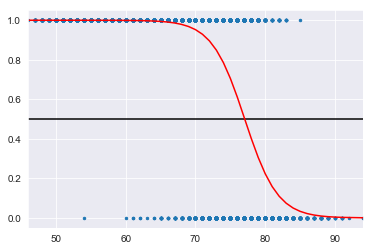

In [10]:
overall_scores = df_lr['Overall']
plt.plot(overall_scores, lr.fittedvalues, color='red')
plt.scatter(overall_scores, df_lr['is_bad_reputation'], s=6, marker='o')
plt.hlines(y=0.5, xmin=min(overall_scores), xmax=max(overall_scores))
plt.ylim(-0.05,1.05)
plt.xlim(min(overall_scores), max(overall_scores))

6. **What is the 90% confidence interval for beta1? How do we interpret this confidence interval?**

    **Answer:**
      - (1-alpha) % Two-sided confidence interval: 
        -  $\beta_1 \pm Z_{(1-alpha/2)} * SE(\beta_1)$
        - [-0.4395, -0.4093 ]
      - If we were to repeat this experiment (sample data from the same distribution and fit the same model) many times, then 90% of the CI's would contain the true beta_1. That is, we can be 90% confident that the log odds of a player with a bad reputation decreases between 0.4093 to 0.4395 for every one unit increase in the Overall score

In [11]:
lr.conf_int(alpha=0.1)

,0,1
Intercept,31.585282,33.827023
Overall,-0.439515,-0.409300


## Possion Regression

We are interested in how many positions a player can compete in a good club. We define the “competence” of a player in a certain position if the player’s score in this position is above 75. For example, the famous Portuguese player Pepe (Id=120533) is competent in 3 positions: LCB, CB and RCB. The list of all positions is: `LS, ST, RS, LW, LF, CF, RF, RW, LAM, CAM, RAM, LM, LCM, CM, RCM, RM, LWB, LDM, CDM, RDM, RWB, LB, LCB, CB, RCB, RB`. The `position_count` is defined as total number of positions a player is competent in. Although this count is limited by 26, we will still treat it as Poisson distributed for the purpose of this practice.

In summary, please first conduct these steps to clean the data:
- Remove the players with International.Reputation = 1
- Remove goalkeepers and players with unknown players, i.e. remove the rows with position = NA or ‘GK’.
- Define `position_count` as above. When parsing the scores, please only include the score before the plus sign. For example, for score 75+3, it is used as 75, and therefore not considered as a competent score.


In [12]:
position_forward = ['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW']
position_mid = ['LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM']
position_back = ['RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']
position_all = position_forward + position_mid + position_back

In [13]:
for column in position_all:
    df[column] = df[column].str.split("+").str[0]
    df[column] = pd.to_numeric(df[column])
    df[column] = np.where(df[column] > 75, 1 , 0)

In [14]:
df['position_cnt'] = df[position_all].sum(axis=1)

In [15]:
df_poisson = df[(df['International Reputation'] > 1) & (df['Position'] != 'GK') & (~df['Position'].isna())].copy()

In [16]:
df_poisson.shape

(1478, 89)

#### 1. Fit a GLM model with 'BallControl' (let's call it model 1). 

How to explain these coefficients (intercept and slope)? 

**Answer:**
1. $\beta_0 = -8.518$, $\beta_1 = 0.129$. The variable BallControl is significant
1. Intercept: For BallControl = 0, the predicted number of positions the player can play in a top club is $\exp(\beta_0) = 0.002$
1. Slope: For every one unit the BallControl skill improves, the number of positions will be $\exp(\beta_1) = 1.138$ times of the number of positions before the improvement.

In [17]:
model1 = smf.glm(formula = 'position_cnt ~ BallControl', data=df_poisson, family=sm.families.Poisson())
model1 = model1.fit()
model1.params

Intercept     -8.518234
BallControl    0.129473
dtype: float64

In [18]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           position_cnt   No. Observations:                 1478
Model:                            GLM   Df Residuals:                     1476
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4846.8
Date:                Fri, 09 Aug 2019   Deviance:                       6690.1
Time:                        11:40:38   Pearson chi2:                 6.81e+03
No. Iterations:                     5   Covariance Type:             nonrobust
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -8.5182      0.146    -58.208      0.000      -8.805      -8.231
BallControl     0.1295      0.002     72.173      0.000       0.126       0.133
===============================================================================
"""

#### 2. Add 'Reaction' into the model (and call it model 2).

What does the coefficients mean at this time?

**Answer:**
1. Same meaning for $\beta_0$
1. Slopes: Given all other features (Reactions) unchanged, one unit of change of BallControl will cause the prediction to become $\exp(0.07)=1.07$ times of that before the change.


In [19]:
model2 = smf.glm(formula = 'position_cnt ~ BallControl + Reactions', data=df_poisson, family=sm.families.Poisson())
model2 = model2.fit()
model2.params

Intercept     -10.932273
BallControl     0.072708
Reactions       0.088782
dtype: float64

In [20]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           position_cnt   No. Observations:                 1478
Model:                            GLM   Df Residuals:                     1475
Model Family:                 Poisson   Df Model:                            2
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4203.2
Date:                Fri, 09 Aug 2019   Deviance:                       5403.0
Time:                        11:40:38   Pearson chi2:                 4.70e+03
No. Iterations:                     5   Covariance Type:             nonrobust
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -10.9323      0.154    -70.793      0.000     -11.235     -10.630
BallControl     0.0727      0.002     32.009      0.000       0.068       0.077
Reactions       0.0888      0.002     35.643      0.000       0.084       0.094
===============================================================================
"""

#### 3. Diagnose the model2 by producing plots:

- Residuals vs Fitted, which draws a scatterplot of fitted values against residuals, with a regression line showing any apparent trend  
- Normal Q-Q, which plots the standardized (z-score) residuals against the theoretical normal quantiles.


#### 4. Is there any problem in model diagnose for model 2? What are the leverage points? 

**Answer:** Outliers exist in residual plot, QQ plot 

In [21]:
def lowess_smooth(x, y):
    lowess = sm.nonparametric.lowess
    z = lowess(y, x, frac=3./4, return_sorted=True)
    return z 

def add_local_smooth(ax, x, y):
    """Add local smoothing lines to a scatter plot."""
    smooth = lowess_smooth(x, y)
    ax.plot(smooth[:,0], smooth[:,1], color='red')
    
def residual_plots(fitted_model, figsize=(10, 4), color='#4C72B0'):
    """Produce residual, and QQ normal plots."""
    resids = fitted_model.resid_anscombe_unscaled
#    resids = fitted_model.resid_pearson
    standardized_resids = fitted_model.resid_anscombe_scaled
    fittedvalues = np.log(fitted_model.fittedvalues)
    
    fig, axes = plt.subplots(1, 2, figsize=figsize)
    
    ## resisual vs. fitted plot
    ax = axes[0]
    ax.scatter(fittedvalues, resids, color=color)
    ax.axhline(y=0, color='grey', linestyle=':')
    add_local_smooth(ax, fittedvalues, resids)
    ax.plot(y=0, color='grey', linestyle=':')
    ax.set_title('Residuals vs Fitted')
    ax.set_xlabel('Fitted Values')
    ax.set_ylabel('Residuals')

    ## resisual QQ plot 
    ax = axes[1]
    stats.probplot(standardized_resids, plot=ax)
    ax.get_lines()[0].set_color(color)
    ax.set_title('Residual Normal QQ Plot')

    fig.tight_layout()
    plt.show()

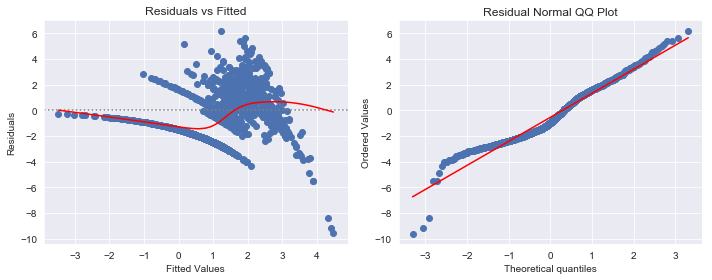

In [22]:
residual_plots(model2)

#### 5. Remove the top 3 players: Messi, Ronaldo and Neymar. Refit model 1 & 2. What do you find this time?
**Answer:** Outliers and influential points problems are mitigated, although there are still some potential leverage points.
    

In [23]:
names_to_remove = [
    'L. Messi', 
    'Cristiano Ronaldo',
    'Neymar Jr'
]
df_poisson2 = df_poisson[~df_poisson['Name'].isin(names_to_remove)]

In [24]:
df_poisson2.shape

(1475, 89)

In [25]:
model21 = smf.glm(formula = 'position_cnt ~ BallControl', data=df_poisson2, family=sm.families.Poisson())
model21 = model21.fit()
model21.params

Intercept     -8.842443
BallControl    0.133610
dtype: float64

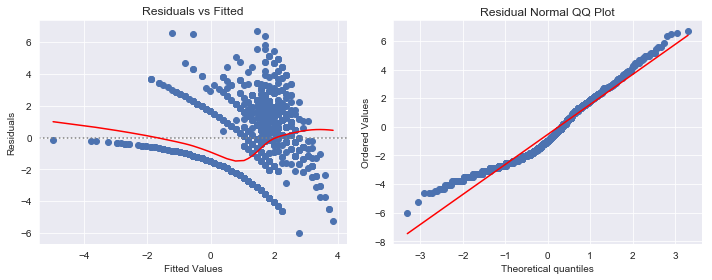

In [26]:
residual_plots(model21)

In [27]:
model21.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           position_cnt   No. Observations:                 1475
Model:                            GLM   Df Residuals:                     1473
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4801.0
Date:                Fri, 09 Aug 2019   Deviance:                       6612.3
Time:                        11:40:39   Pearson chi2:                 6.88e+03
No. Iterations:                     5   Covariance Type:             nonrobust
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -8.8424      0.152    -58.001      0.000      -9.141      -8.544
BallControl     0.1336      0.002     71.399      0.000       0.130       0.137
===============================================================================
"""

In [28]:
model22 = smf.glm(formula = 'position_cnt ~ BallControl + Reactions', data=df_poisson2, family=sm.families.Poisson())
model22 = model22.fit()
model22.params

Intercept     -11.968023
BallControl     0.076069
Reactions       0.098684
dtype: float64

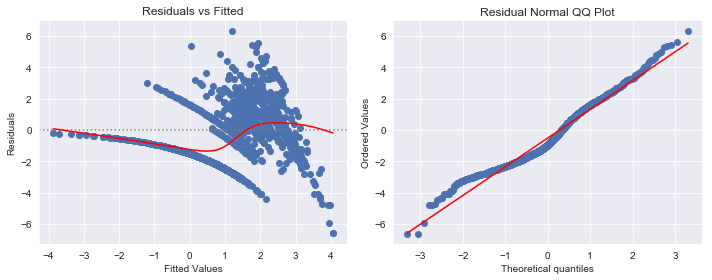

In [29]:
residual_plots(model22)

It is important to be aware that the range of response (position_count) is bounded (to 26 max) and hence violates one of the assumptions of Poisson regression

## ANOVA Test

1. For multivariate regression, using log_Value as target variable (refer to exercise in the linear regression chapter), fit two models:
    1. Model 1: log_Value ~ age_cat
    1. Model 2: log_Value ~ age_cat + BallControl
    
  Also perform ANOVA to compare Model 1 and Model 2. What is your conclusion? Look at the t-value of BallControl for Model 2, and look at the F-value for the ANOVA. What is the relationship between these two values?


**Answer**
- The model summary shows that the added BallControl variable in model 2 is statistically significant.
- Anova results also show that BallControl brings significant improvement of the linear model.
- The t-value in model2 for BallControl is 28.73, and F-value in ANOVA is 825.43, which is the square of t-value. Essentially the individual feature test in Model 2 is the same as anova test for BallControl.

In [30]:
def convert_str_value_to_numeric(str_value):
    if str_value in ['NaN', 'nan', np.nan]:
        return np.nan
    else:
        if str_value.endswith('K'):
            multiplier = 1
        elif str_value.endswith('M'):
            multiplier = 1000
        else:
            multiplier = 1
        
        re_pattern = re.compile('[^0-9\.\-]')
        return float(re.sub(re_pattern, '', str_value)) * multiplier

In [31]:
df_anova = df_poisson.copy()
df_anova['Value'] = df_anova['Value'].apply(convert_str_value_to_numeric)
df_anova['Wage'] = df_anova['Wage'].apply(convert_str_value_to_numeric)
df_anova['Release Clause'] = df_anova['Release Clause'].apply(convert_str_value_to_numeric)

In [32]:
df_anova= df_anova[df_anova['Value'] > 50].copy()
df_anova['log_Value'] = np.log(df_anova['Value'])

In [33]:
age_cat = pd.cut(
    df_anova['Age'], 
    [0, 22, 31, 50],
    ['22 and under', '23-31', '32+'])

df_anova['age_cat'] = age_cat

In [34]:
model1 = smf.ols(formula = 'log_Value ~ age_cat', data=df_anova)
model1 = model1.fit()

model2 = smf.ols(formula = 'log_Value ~ age_cat + BallControl', data=df_anova)
model2 = model2.fit()

model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_Value   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     622.6
Date:                Fri, 09 Aug 2019   Prob (F-statistic):          3.18e-260
Time:                        11:40:40   Log-Likelihood:                -1767.1
No. Observations:                1458   AIC:                             3542.
Df Residuals:                    1454   BIC:                             3563.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                       3.8527      0.231     16.703      0.000       3.400       4.305
age_cat[T.Interval(22, 31, closed='right')]    -0.4181      0.103     -4.057      0.000      -0.620      -0.216
age_cat[T.Interval(31, 50, closed='right')]    -1.5674      0.110    -14.288      0.000      -1.783      -1.352
BallControl                                     0.0758      0.003     28.730      0.000       0.071       0.081
==============================================================================
Omnibus:                       26.018   Durbin-Watson:                   0.879
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.555
Skew:                           0.055   Prob(JB):                     2.86e-11
Kurtosis:                       3.887   Cond. No.                         875.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
sm.stats.anova_lm(model1, model2)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,1455.0,1511.026943,0.0,NaN,NaN,NaN
1,1454.0,963.851280,1.0,547.175664,825.431715,3.846158e-144


2. For logistic regression, using is_bad_reputationas target variable, create nested models as below and perform ANOVA. Which model do youthink is the best?
    1. Model 1: is_bad_reputation ~ Overall
    1. Model 2: Model 1 + Potential
    1. Model 3: Model 2 + Composure
    1. Model 4: Model 3 + Reactions

--> Model 3

In [36]:
# It seems that Python statsmodels doesn't support running anova directly for glm
# calculate the p-value 
# Please see https://thestatsgeek.com/2014/04/26/deviance-goodness-of-fit-test-for-poisson-regression/
# in section Comparing Nested models with Deviance
lr1 = smf.glm('is_bad_reputation ~ Overall', data=df_lr, family=sm.families.Binomial()).fit()
lr2 = smf.glm('is_bad_reputation ~ Overall + Potential', data=df_lr, family=sm.families.Binomial()).fit()
lr3 = smf.glm('is_bad_reputation ~ Overall + Potential + Composure ', data=df_lr, family=sm.families.Binomial()).fit()
lr4 = smf.glm('is_bad_reputation ~ Overall + Potential + Composure + Reactions', data=df_lr, family=sm.families.Binomial()).fit()

In [37]:
print('the p-value for Chi-sqare test between model 1 and model 2 is ',1 - stats.chi2.cdf((lr1.deviance - lr2.deviance), 1))
print('the p-value for Chi-sqare test between model 2 and model 3 is ',1 - stats.chi2.cdf((lr2.deviance - lr3.deviance), 1))
print('the p-value for Chi-sqare test between model 3 and model 4 is ',1 - stats.chi2.cdf((lr3.deviance - lr4.deviance), 1))

the p-value for Chi-sqare test between model 1 and model 2 is  0.0
the p-value for Chi-sqare test between model 2 and model 3 is  0.0
the p-value for Chi-sqare test between model 3 and model 4 is  0.13227287469242077


3. For the Poisson regression, using positions_count as target variable create nested models as below. Conduct anova on these models. What is your conclusion?
    1. Model 1: positions_count ~ BallControl + Reactions
    1. Model 2: Model 1 + SlidingTackle + SprintSpeed + HeadingAccuracy + Finishing + ShortPassing
    1. Model 3: Model 2 + Volleys + Curve

In [38]:
poi1 = smf.glm(formula = 'position_cnt ~ BallControl + Reactions', 
               data=df_poisson2, 
               family=sm.families.Poisson()).fit()
poi2 = smf.glm(formula = 'position_cnt ~ BallControl +  Reactions + \
                SlidingTackle + SprintSpeed + \
                HeadingAccuracy + Finishing + ShortPassing',
               data=df_poisson2, 
               family=sm.families.Poisson()).fit()
poi3 = smf.glm(formula = 'position_cnt ~ BallControl +  Reactions + \
                SlidingTackle + SprintSpeed + \
                HeadingAccuracy + Finishing + ShortPassing \
                + Volleys + Curve',
               data=df_poisson2, 
               family=sm.families.Poisson()).fit()

In [39]:
print('the p-value for Chi-sqare test between model 1 and model 2 is ',1 - stats.chi2.cdf((poi1.deviance - poi2.deviance), 5))
print('the p-value for Chi-sqare test between model 2 and model 3 is ',1 - stats.chi2.cdf((poi2.deviance - poi3.deviance), 2))

the p-value for Chi-sqare test between model 1 and model 2 is  0.0
the p-value for Chi-sqare test between model 2 and model 3 is  0.348424899299699


--> Model 2